## EDA on sentence_text

In [1]:
import os
os.getcwd()

'c:\\Users\\Tristan\\Desktop\\Capstone ML and Data privacy\\capstone-repo\\code'

In [11]:
import pandas as pd
import sklearn
import seaborn as sns

PATH = r"../dataset/concat.csv"


In [7]:
df = pd.read_csv(PATH)
df.head()

,sentence_text,practice,modality
0,"IP ADDRESS, COOKIES, AND WEB BEACONS",Identifier_Cookie_or_similar_Tech_1stParty,PERFORMED
1,"IP ADDRESS, COOKIES, AND WEB BEACONS",Identifier_IP_Address_1stParty,PERFORMED
2,"IP addresses will be collected, along with inf...",Identifier_IP_Address_1stParty,PERFORMED
3,The information that our products collect incl...,Identifier_Cookie_or_similar_Tech_1stParty,PERFORMED
4,The information that our products collect incl...,Identifier_IP_Address_1stParty,PERFORMED


In [10]:
# Number of records
print(len(df))

18829
['Identifier_Cookie_or_similar_Tech_1stParty'
 'Identifier_IP_Address_1stParty'
 'Identifier_Cookie_or_similar_Tech_3rdParty' 'Demographic_3rdParty'
 'Demographic_Age_3rdParty' 'Contact_E_Mail_Address_1stParty'
 'Demographic_Age_1stParty' 'Contact_Phone_Number_1stParty'
 'Contact_Postal_Address_1stParty' 'Facebook_SSO' 'SSO'
 'Contact_Address_Book_1stParty' 'Contact_Password_1stParty'
 'Demographic_1stParty' 'Identifier_Ad_ID_1stParty'
 'Identifier_Device_ID_1stParty' 'Location_1stParty'
 'Identifier_IMEI_1stParty' 'Identifier_IMSI_1stParty'
 'Identifier_SSID_BSSID_1stParty' 'Location_Cell_Tower_1stParty'
 'Location_IP_Address_1stParty' 'Location_3rdParty'
 'Location_Cell_Tower_3rdParty' 'Location_IP_Address_3rdParty'
 'Identifier_IP_Address_3rdParty' 'Contact_E_Mail_Address_3rdParty'
 'Identifier_MAC_1stParty' 'Demographic_Gender_1stParty'
 'Contact_1stParty' 'Contact_Postal_Address_3rdParty'
 'Identifier_1stParty' 'Identifier_Mobile_Carrier_1stParty'
 'Contact_ZIP_1stParty' 'Id

### Counts per each practice
Taking into account that one sentence can have multiple labels

In [43]:
# Counts of each practice
df_by_practice = df["practice"].value_counts(sort = True).rename_axis('practice').reset_index(name = "counts")
df_by_practice

,practice,counts
0,Identifier_Cookie_or_similar_Tech_1stParty,2107
1,Contact_E_Mail_Address_1stParty,2106
2,Location_1stParty,1514
3,Identifier_Cookie_or_similar_Tech_3rdParty,1250
4,Identifier_IP_Address_1stParty,1005
5,Contact_Phone_Number_1stParty,970
6,Identifier_Device_ID_1stParty,697
7,Contact_Postal_Address_1stParty,597
8,SSO,504
9,Demographic_Age_1stParty,428


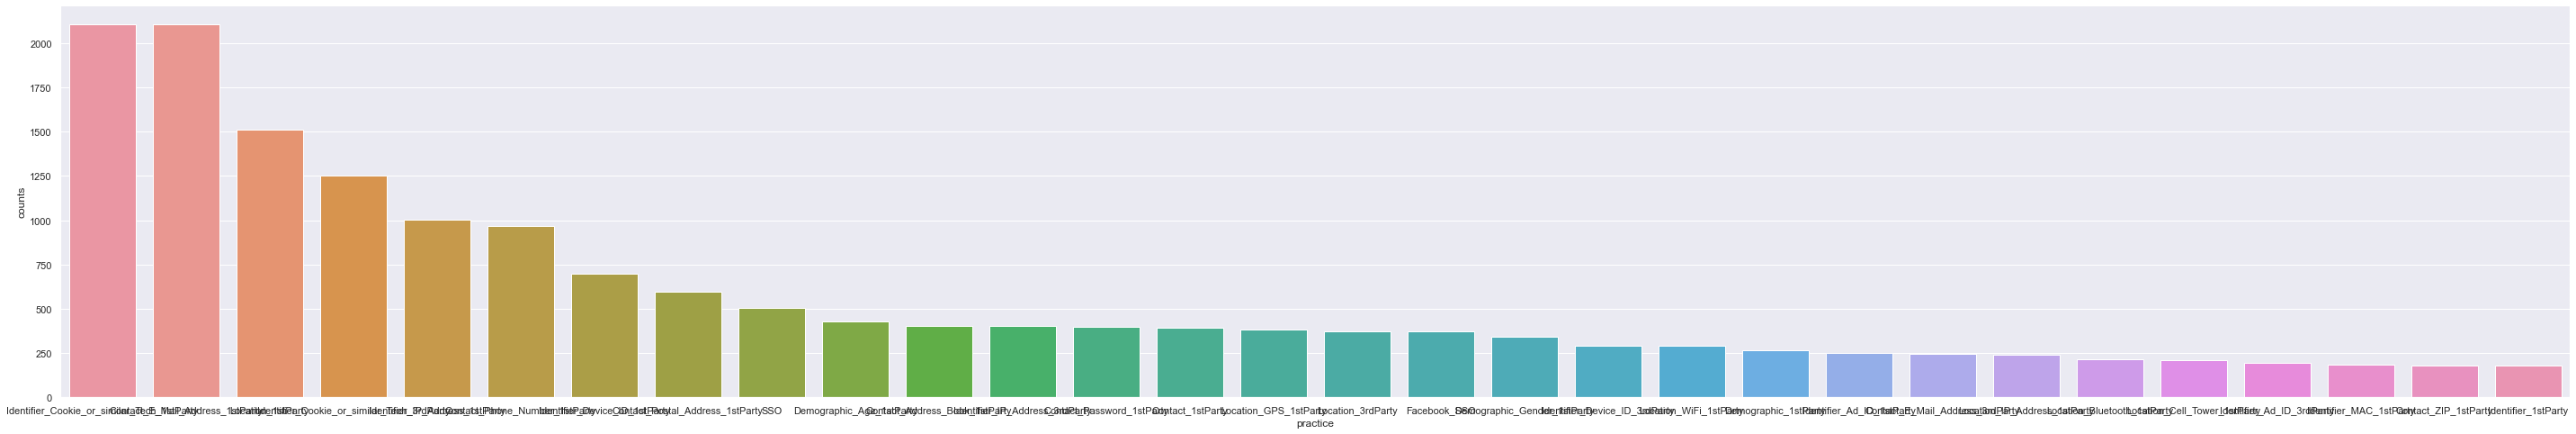

In [27]:
sns.set(rc = {'figure.figsize':(50,8)})
ax = sns.barplot(x = "practice", y = "counts", data = df_by_practice[:30])

### Sentence length statistics: by word, correlations between length and practice?

In [30]:
# Duplicate df
df_sentence_statistics = df

import re

In [31]:
df_sentence_statistics["sentence_length"] = df_sentence_statistics["sentence_text"].apply(lambda sen: len(re.findall(r'\w+', sen)))

In [33]:
df_sentence_statistics["sentence_length"].describe()

count    18829.000000
mean        29.779170
std         22.885182
min          1.000000
25%         16.000000
50%         25.000000
75%         37.000000
max        496.000000
Name: sentence_length, dtype: float64

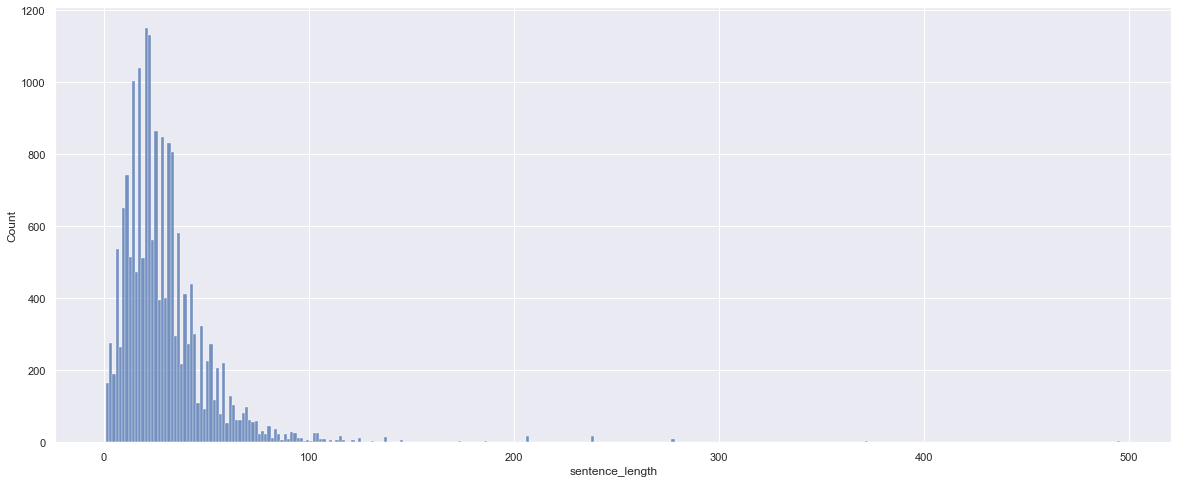

In [35]:
# Histogram of sentence length
sns.set(rc = {'figure.figsize':(20,8)})
ax = sns.histplot(x = "sentence_length",  data = df_sentence_statistics)

In [42]:
## Average Sentence length by type of practice
df_sentence_statistics.groupby(["practice"]).mean().sort_values(by = "sentence_length", ascending=False)

,sentence_length
practice,
Identifier_SSID_BSSID_3rdParty,65.500000
Identifier_IMSI_3rdParty,54.250000
Identifier_IMSI_1stParty,48.153846
Identifier_Mobile_Carrier_3rdParty,47.057143
Identifier_SIM_Serial_3rdParty,41.200000
Contact_ZIP_3rdParty,40.176471
Contact_Address_Book_3rdParty,39.647059
Contact_Phone_Number_3rdParty,38.019048
Identifier_IMEI_1stParty,37.061224


In [44]:
# Median sentence length by practice
df_sentence_statistics.groupby(["practice"]).median().sort_values(by = "sentence_length", ascending=False)

,sentence_length
practice,
Identifier_SSID_BSSID_3rdParty,65.5
Identifier_SIM_Serial_3rdParty,54.0
Identifier_IMSI_3rdParty,47.5
Identifier_IMSI_1stParty,44.0
Contact_ZIP_3rdParty,41.0
Contact_Phone_Number_3rdParty,34.0
Contact_Address_Book_3rdParty,34.0
Identifier_IMEI_1stParty,33.5
Identifier_MAC_1stParty,31.0


In [45]:
# Concat to df_by_practice
df_by_practice = pd.merge(left = df_by_practice, right = df_sentence_statistics.groupby(["practice"]).mean(), how = "outer", left_on = "practice", right_on = "practice", suffixes = (None, "_mean"))

In [50]:
df_by_practice = pd.merge(left = df_by_practice, right = df_sentence_statistics.groupby(["practice"]).median(), how = "outer", left_on = "practice", right_on = "practice", suffixes = (None, "_median"))

In [51]:
# Sanity check
df_by_practice.head()

,practice,counts,sentence_length,sentence_length_mean,sentence_length_median
0,Identifier_Cookie_or_similar_Tech_1stParty,2107,22.0,25.389654,22.0
1,Contact_E_Mail_Address_1stParty,2106,25.0,28.651472,25.0
2,Location_1stParty,1514,24.0,29.159181,24.0
3,Identifier_Cookie_or_similar_Tech_3rdParty,1250,24.0,27.318400,24.0
4,Identifier_IP_Address_1stParty,1005,27.0,30.913433,27.0
